# Final exam of Image Processing and analysis


In [1]:
# Import the required tools
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Part 1 : Introduction

1. Read and display the image rice.tif

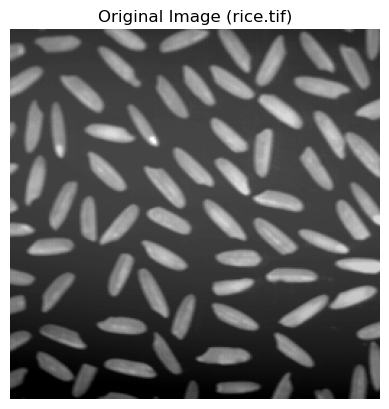

In [2]:
# Load the image
image = cv2.imread('rice.tif', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image (rice.tif)')
plt.axis('off')  # Turn off axis labels
plt.show()

2. Which is the format of the image. Convert it to a graylevel image if it is not

In [3]:
image = cv2.imread('rice.tif', cv2.IMREAD_GRAYSCALE)

3. Draw the histogram of the image rice

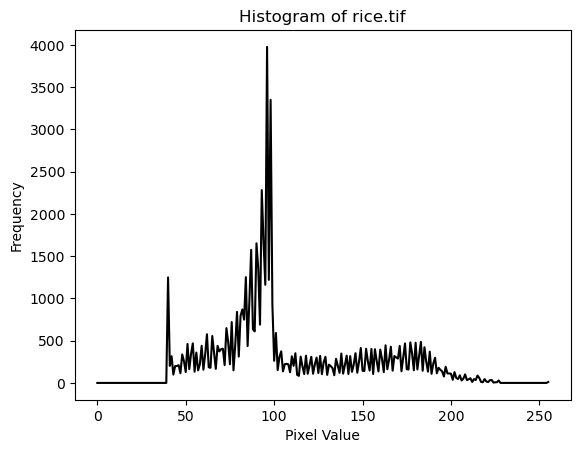

In [4]:
# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of rice.tif')
plt.show()

4. Folowing this histogram, how many clusters could we deduce from the image? Is it conform to the visual aspect of the image having a background and the object (rice)?

## Part 2 : Image Processing

5. Consider that our image is basically not perfect, carry out histogram equalization on the image rice. What is the impact of this processing, is the image visually better?

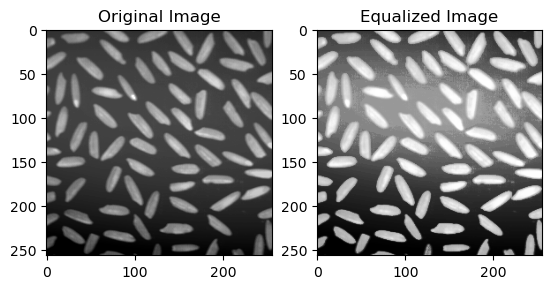

In [5]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the original and equalized images side by side
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(equalized_image, cmap='gray'), plt.title('Equalized Image')
plt.show()

6. Add 2% of salt and pepper noise and display the noised image.

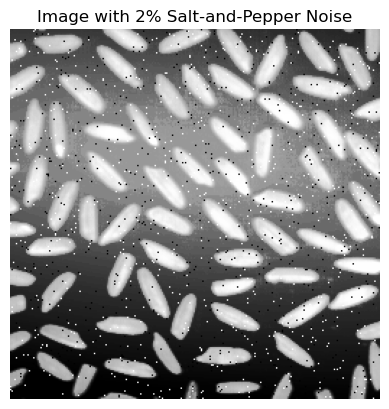

In [6]:
noise_image = cv2.equalizeHist(image)
# Add 2% salt-and-pepper noise 
noise_ratio = 0.02
salt_pepper = np.random.rand(noise_image.shape[0], noise_image.shape[1])

noise_image[salt_pepper < noise_ratio / 2] = 0  # Pepper noise
noise_image[salt_pepper > 1 - noise_ratio / 2] = 255  # Salt noise

# Display the noised image
plt.imshow(noise_image, cmap='gray')
plt.title('Image with 2% Salt-and-Pepper Noise')
plt.axis('off')  # Turn off axis labels
plt.show()

7. Draw again the histogram of the noised image and evaluate again the number of clusters. What do you thing about this noise? 

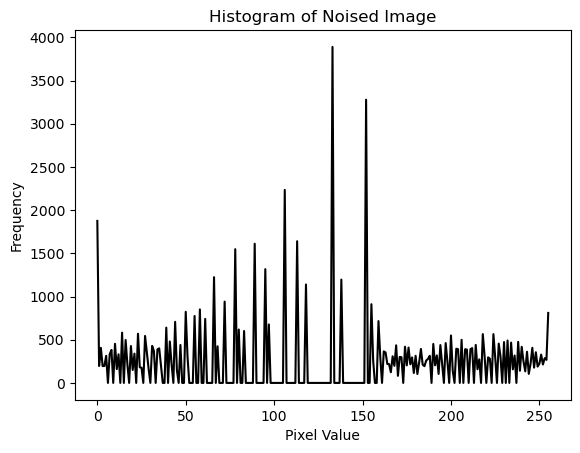

In [7]:
# Draw histogram of the noised image
hist_noised_image = cv2.calcHist([noise_image], [0], None, [256], [0, 256])

# Display the histogram
plt.plot(hist_noised_image, color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Noised Image')
plt.show()


8. Apply two filters to the noised image : an average filter and another one you judge convenient. Display the reslut of the two filtered images. 

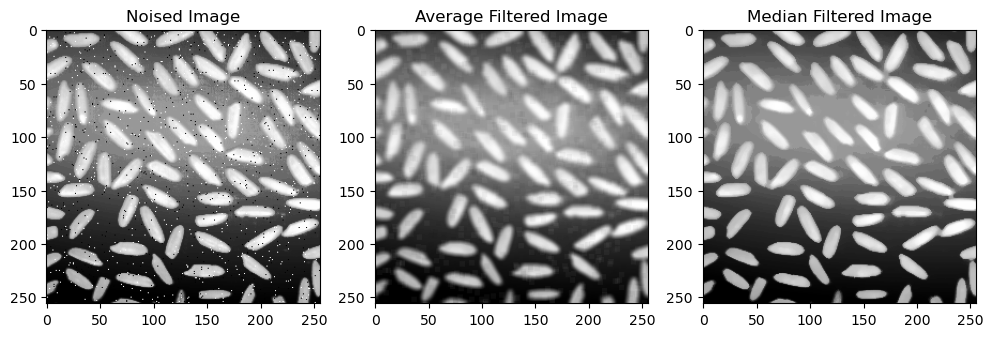

In [8]:
# Apply average filter
average_filtered = cv2.blur(noise_image, (5, 5))

# Apply median filter
median_filtered = cv2.medianBlur(noise_image, 5)  

# Display the original, noised, and filtered images
plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(noise_image, cmap='gray'), plt.title('Noised Image')
plt.subplot(132), plt.imshow(average_filtered, cmap='gray'), plt.title('Average Filtered Image')
plt.subplot(133), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered Image')

plt.show()

9. Display the histograms of the two filtered images. How many clusters you can deduce from these two histograms. Which filtering is more convenient with regard to the number of clusters on the original image (background and object)? 

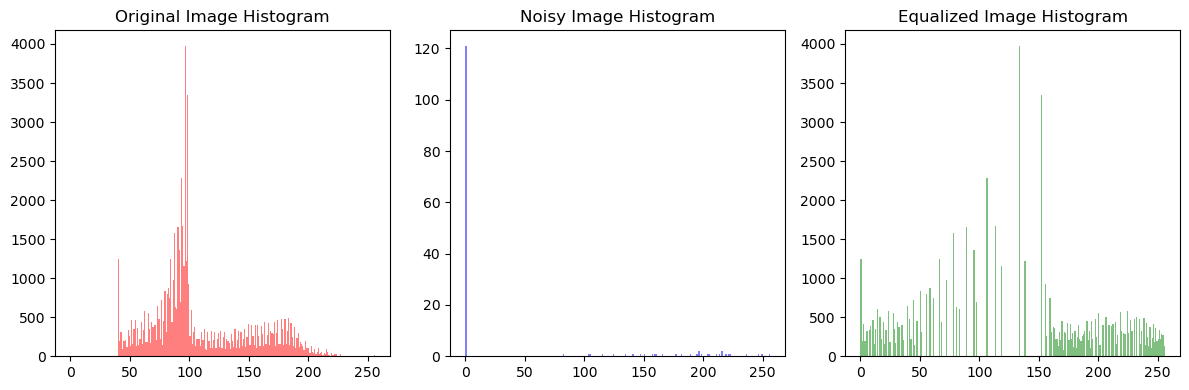

In [9]:
# Display histograms
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(image.flatten(), bins=256, range=[0, 256], color='r', alpha=0.5)
plt.title('Original Image Histogram')

plt.subplot(132)
plt.hist(hist_noised_image.flatten(), bins=256, range=[0, 256], color='b', alpha=0.5)
plt.title('Noisy Image Histogram')

plt.subplot(133)
plt.hist(equalized_image.flatten(), bins=256, range=[0, 256], color='g', alpha=0.5)
plt.title('Equalized Image Histogram')

plt.tight_layout()
plt.show()

## Part 3 : The whole chain

10. Display on the same window the six images : 
- the original image, 
- the noised image, 
- the original after histogram equalization 
- the noised image after histogram equalization
- the two filterd images

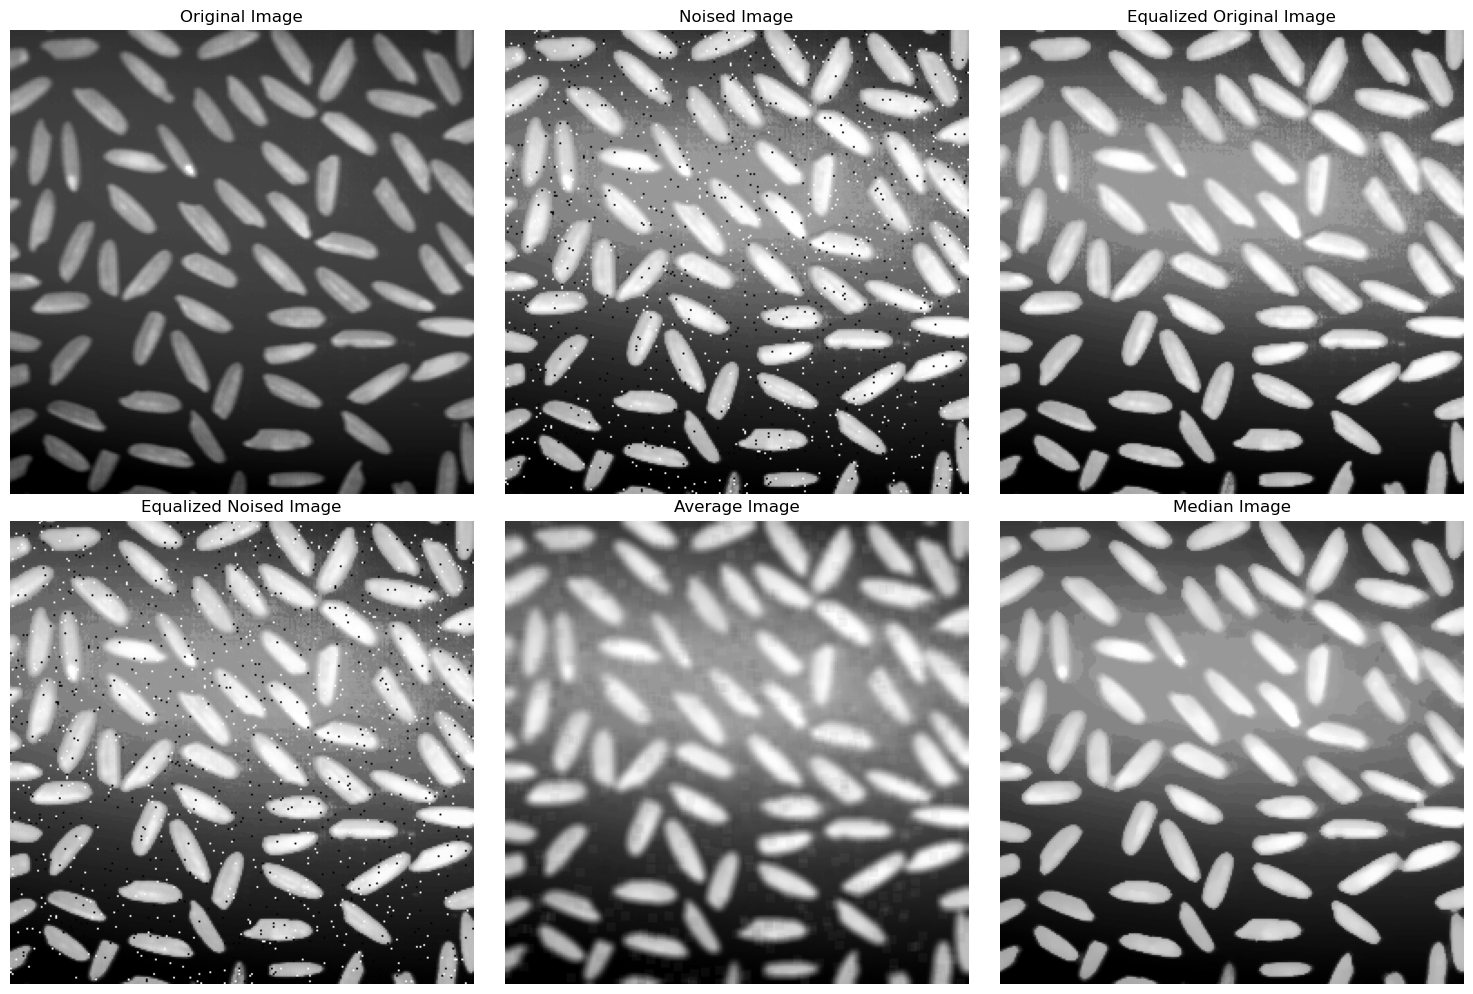

In [10]:
# Apply histogram equalization
equalized_noisy_img = cv2.equalizeHist(noise_image)

# Display the six images
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(noise_image, cmap='gray')
plt.title('Noised Image')
plt.axis('off')

plt.subplot(233)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Original Image')
plt.axis('off')

plt.subplot(234)
plt.imshow(equalized_noisy_img, cmap='gray')
plt.title('Equalized Noised Image')
plt.axis('off')

plt.subplot(235)
plt.imshow(average_filtered, cmap='gray')
plt.title('Average Image')
plt.axis('off')


plt.subplot(236)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Image')
plt.axis('off')

plt.tight_layout()
plt.show()

11. Analyse qualitatively the impact of the different processing. Wich one is more convenient, histogram enhancement or filtering? 

# "Answer here"
## Filtered is better. After the supermoised Filtered looks better than oters.

12. Carry out edge detection on the 6 previous images and display the results again on the same window.

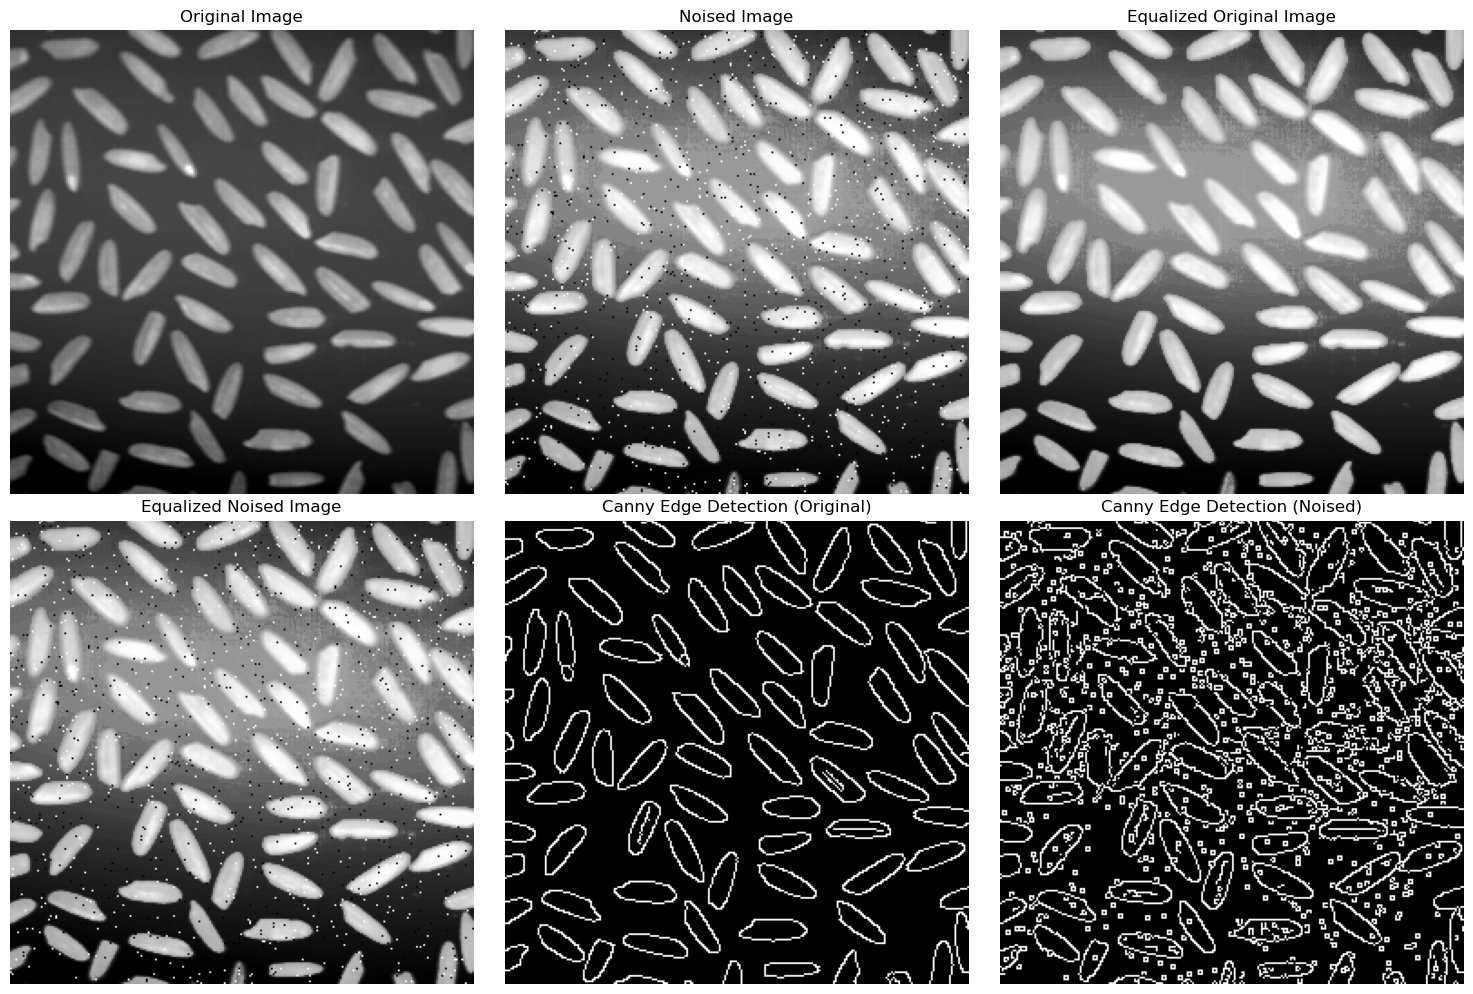

In [11]:
# Apply edge detection using Canny
canny_original = cv2.Canny(image, 50, 150)
canny_noisy = cv2.Canny(noise_image, 50, 150)
canny_equalized = cv2.Canny(equalized_image, 50, 150)
canny_equalized_noisy = cv2.Canny(equalized_noisy_img, 50, 150)

# Display the six images with edge detection results
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(noise_image, cmap='gray')
plt.title('Noised Image')
plt.axis('off')

plt.subplot(233)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Original Image')
plt.axis('off')

plt.subplot(234)
plt.imshow(equalized_noisy_img, cmap='gray')
plt.title('Equalized Noised Image')
plt.axis('off')

plt.subplot(235)
plt.imshow(canny_original, cmap='gray')
plt.title('Canny Edge Detection (Original)')
plt.axis('off')

plt.subplot(236)
plt.imshow(canny_noisy, cmap='gray')
plt.title('Canny Edge Detection (Noised)')
plt.axis('off')

plt.tight_layout()
plt.show()


13. Hold on (superimpose) each detected edges on the original image. Display the six superpositions in red in the same window. Is this result conform to the visual anlysis of question 11? 


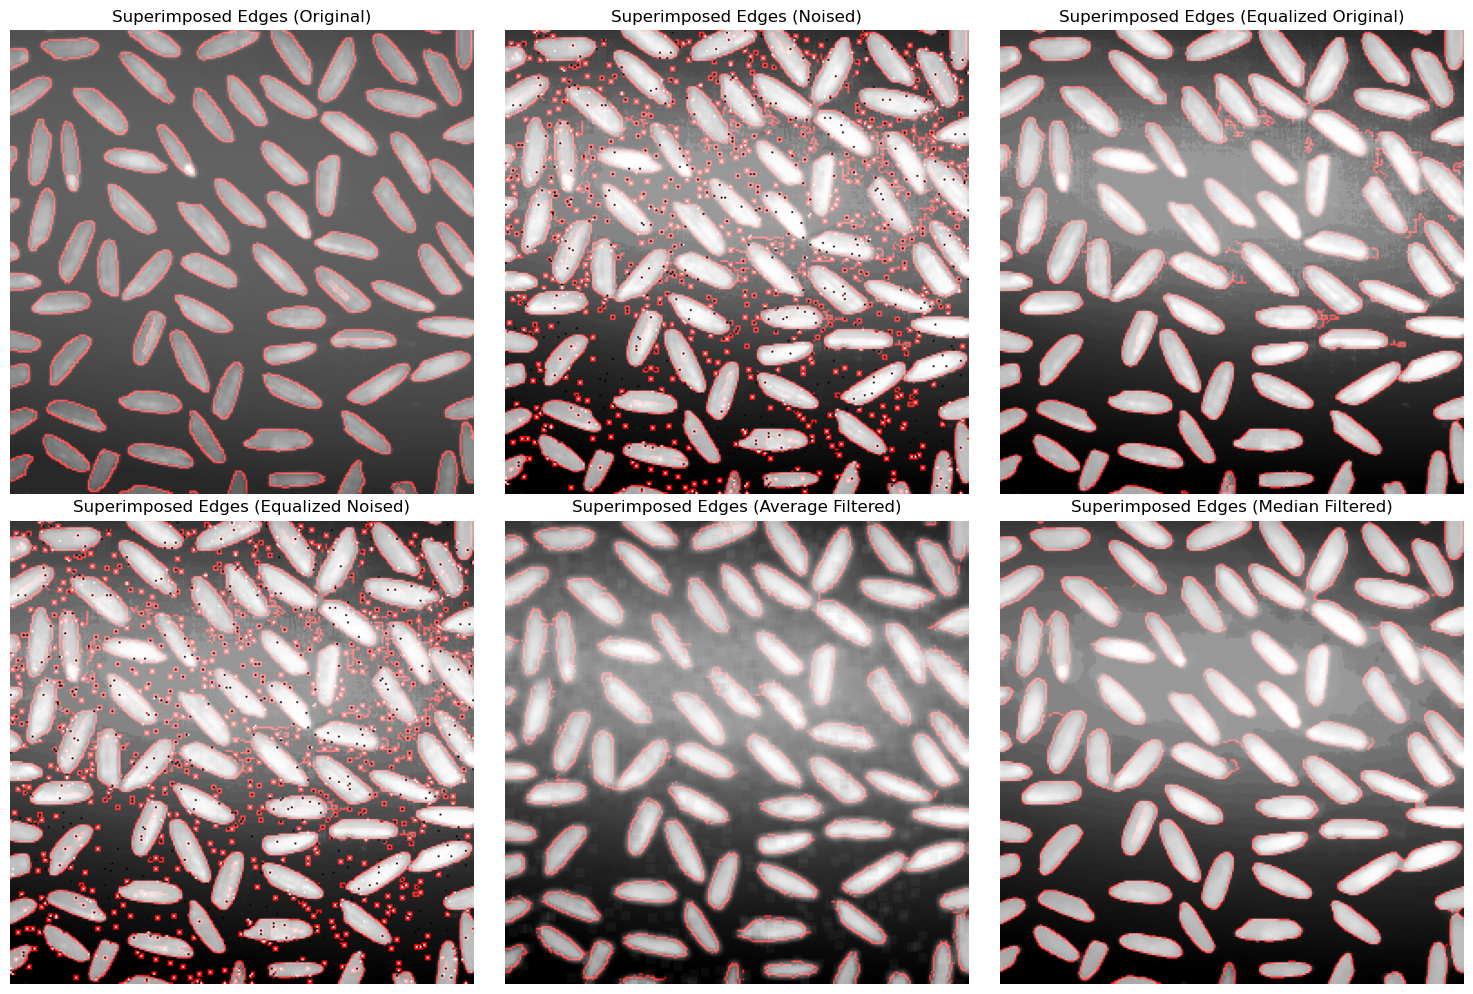

In [18]:
# Function to superimpose edges in red
def superimpose_edges(image, edges):
    superimposed = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    superimposed[:, :, 0] = cv2.bitwise_or(image, edges)
    return superimposed

# Superimpose edges on the original images
superimposed_original = superimpose_edges(image, canny_original)
superimposed_noisy = superimpose_edges(noise_image, canny_noisy)
superimposed_equalized = superimpose_edges(equalized_image, canny_equalized)
superimposed_equalized_noisy = superimpose_edges(equalized_noisy_img, canny_equalized_noisy)
superimposed_average_filtered = superimpose_edges(average_filtered, cv2.Canny(average_filtered, 50, 150))
superimposed_median_filtered = superimpose_edges(median_filtered, cv2.Canny(median_filtered, 50, 150))

# Display the six superimposed images in red
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(superimposed_original)
plt.title('Superimposed Edges (Original)')
plt.axis('off')

plt.subplot(232)
plt.imshow(superimposed_noisy)
plt.title('Superimposed Edges (Noised)')
plt.axis('off')

plt.subplot(233)
plt.imshow(superimposed_equalized)
plt.title('Superimposed Edges (Equalized Original)')
plt.axis('off')

plt.subplot(234)
plt.imshow(superimposed_equalized_noisy)
plt.title('Superimposed Edges (Equalized Noised)')
plt.axis('off')

plt.subplot(235)
plt.imshow(superimposed_average_filtered)
plt.title('Superimposed Edges (Average Filtered)')
plt.axis('off')

plt.subplot(236)
plt.imshow(superimposed_median_filtered)
plt.title('Superimposed Edges (Median Filtered)')
plt.axis('off')

plt.tight_layout()
plt.show()


NB : Send me the pdf, HTML and ipynb files. The name of the file should contain you name.